In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\tejas\\Desktop\\Learning\\Practical\\ML\\Assignment 2\\emails.csv")

In [3]:
df.shape

(5172, 3002)

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [10]:
x=df.drop(["Email No.","Prediction"],axis=1)

y=df["Prediction"]

In [11]:
x.shape

(5172, 3000)

In [13]:
set(x.dtypes)

{dtype('int64')}

<Axes: xlabel='Prediction', ylabel='count'>

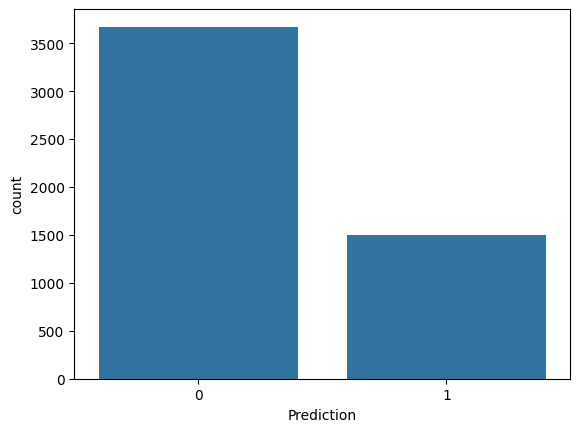

In [14]:
import seaborn as sns
sns.countplot(x=y)

In [16]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler
x_scale=MinMaxScaler().fit_transform(x)
x_scale

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,random_state=0,test_size=0.25)

In [20]:
x_scale.shape

(5172, 3000)

In [21]:
x_train.shape

(3879, 3000)

In [22]:
x_test.shape

(1293, 3000)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
y_pred=knn.predict(x_test)

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

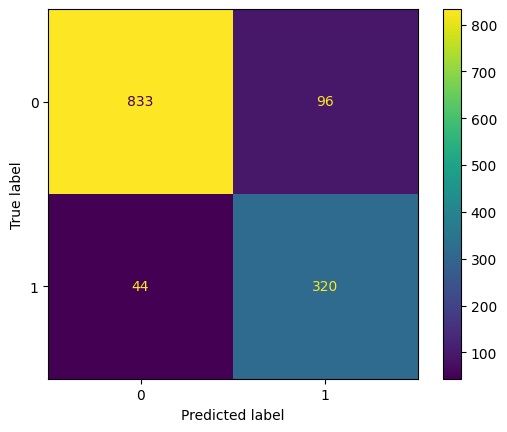

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [37]:
y_test.value_counts()

Prediction
0    929
1    364
Name: count, dtype: int64

In [38]:
accuracy_score(y_test,y_pred)

0.8917246713070379

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       929
           1       0.77      0.88      0.82       364

    accuracy                           0.89      1293
   macro avg       0.86      0.89      0.87      1293
weighted avg       0.90      0.89      0.89      1293



In [40]:
import numpy as np

In [48]:
error=[]
for k in range(1, 41):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(pred!=y_pred))
    

In [49]:
error

[0.0,
 0.04640371229698376,
 0.07811291569992267,
 0.0843000773395205,
 0.09899458623356536,
 0.09976798143851508,
 0.1268368136117556,
 0.12529002320185614,
 0.15081206496519722,
 0.1453982985305491,
 0.168600154679041,
 0.1662799690641918,
 0.1902552204176334,
 0.1902552204176334,
 0.20959010054137664,
 0.20649651972157773,
 0.21577726218097448,
 0.21500386697602475,
 0.22892498066511988,
 0.2266047950502707,
 0.23897911832946636,
 0.23820572312451663,
 0.24980665119876258,
 0.24903325599381285,
 0.26063418406805877,
 0.2614075792730085,
 0.2722351121423047,
 0.27068832173240526,
 0.2791956689868523,
 0.2768754833720031,
 0.28074245939675174,
 0.28074245939675174,
 0.2877030162412993,
 0.2877030162412993,
 0.29311678267594743,
 0.2923433874709977,
 0.30162412993039445,
 0.3039443155452436,
 0.3109048723897912,
 0.3109048723897912]

In [51]:
from sklearn.svm import SVC

In [52]:
svm=SVC(kernel="linear")

In [53]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [54]:
y_pred=svm.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred)

0.9767981438515081